In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv("연습1.csv",encoding = 
                 'euc-kr',index_col = 0)

from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [43]:
df["일강수량(mm)"].fillna(0,inplace =True)

In [44]:
df=df.dropna(axis = 0 )

In [45]:
df.head()

,최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),풍정합(100m),최소 상대습도(%),평균 상대습도(%),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),분류
일시,,,,,,,,,,,,,
2019-01-01,7.0,0.0,13.6,7.6,5.3,4560.0,47.0,61.1,10.0,9.0,9.0,4.8,45
2019-01-02,6.1,0.0,11.4,6.2,3.9,340560.0,53.1,61.0,9.9,8.8,8.8,4.6,45
2019-01-03,8.0,0.0,8.2,5.1,2.7,234000.0,41.2,60.0,9.9,4.1,4.1,5.5,54
2019-01-04,10.0,1.6,7.6,4.6,2.0,174960.0,62.7,78.0,9.9,8.1,6.3,5.2,41
2019-01-05,9.0,0.0,8.9,5.1,3.2,274320.0,49.5,67.0,9.9,5.9,5.1,6.6,52


In [46]:
df.isnull().sum()

최고기온(°C)          0
일강수량(mm)          0
최대 순간 풍속(m/s)     0
최대 풍속(m/s)        0
평균 풍속(m/s)        0
풍정합(100m)         0
최소 상대습도(%)        0
평균 상대습도(%)        0
가조시간(hr)          0
평균 전운량(1/10)      0
평균 중하층운량(1/10)    0
평균 지면온도(°C)       0
분류                0
dtype: int64

In [47]:
df.corr()

,최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),풍정합(100m),최소 상대습도(%),평균 상대습도(%),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),분류
최고기온(°C),1.000000,0.175206,-0.096924,-0.056964,-0.221401,-0.216202,0.315711,0.439160,0.839474,-0.085174,-0.246872,0.955660,0.216157
일강수량(mm),0.175206,1.000000,0.314171,0.289182,0.220952,0.199497,0.338721,0.392572,0.173523,0.304290,0.255761,0.131605,-0.259326
최대 순간 풍속(m/s),-0.096924,0.314171,1.000000,0.959380,0.838739,0.756396,0.076888,0.105571,-0.140761,0.316156,0.411179,-0.162483,-0.373513
최대 풍속(m/s),-0.056964,0.289182,0.959380,1.000000,0.826994,0.765547,0.071070,0.114993,-0.082707,0.278655,0.366372,-0.114021,-0.333675
평균 풍속(m/s),-0.221401,0.220952,0.838739,0.826994,1.000000,0.917876,-0.021487,-0.056008,-0.194272,0.215047,0.386557,-0.242118,-0.321882
풍정합(100m),-0.216202,0.199497,0.756396,0.765547,0.917876,1.000000,-0.020667,-0.059725,-0.181883,0.200713,0.355750,-0.236499,-0.279176
최소 상대습도(%),0.315711,0.338721,0.076888,0.071070,-0.021487,-0.020667,1.000000,0.887414,0.274502,0.453708,0.447447,0.284019,-0.244754
평균 상대습도(%),0.439160,0.392572,0.105571,0.114993,-0.056008,-0.059725,0.887414,1.000000,0.406304,0.494609,0.399907,0.399535,-0.236685
가조시간(hr),0.839474,0.173523,-0.140761,-0.082707,-0.194272,-0.181883,0.274502,0.406304,1.000000,-0.019257,-0.237865,0.899129,0.271198
평균 전운량(1/10),-0.085174,0.304290,0.316156,0.278655,0.215047,0.200713,0.453708,0.494609,-0.019257,1.000000,0.826562,-0.129851,-0.517777


In [48]:
X, y = df.iloc[:,2:],df.iloc[:,:-1]

In [49]:
print(y)

            최고기온(°C)  일강수량(mm)  최대 순간 풍속(m/s)  최대 풍속(m/s)  평균 풍속(m/s)  \
일시                                                                      
2019-01-01       7.0       0.0           13.6         7.6         5.3   
2019-01-02       6.1       0.0           11.4         6.2         3.9   
2019-01-03       8.0       0.0            8.2         5.1         2.7   
2019-01-04      10.0       1.6            7.6         4.6         2.0   
2019-01-05       9.0       0.0            8.9         5.1         3.2   
...              ...       ...            ...         ...         ...   
2019-12-27       7.3       0.0           17.5         9.5         5.2   
2019-12-28       9.7       0.0            6.6         4.0         2.0   
2019-12-29      16.4      11.4           10.8         5.9         2.9   
2019-12-30      13.6       0.0           14.0         7.7         3.8   
2019-12-31       6.4       0.0           17.3        10.0         5.3   

            풍정합(100m)  최소 상대습도(%)  평균 상대습도(%)  가조시

C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


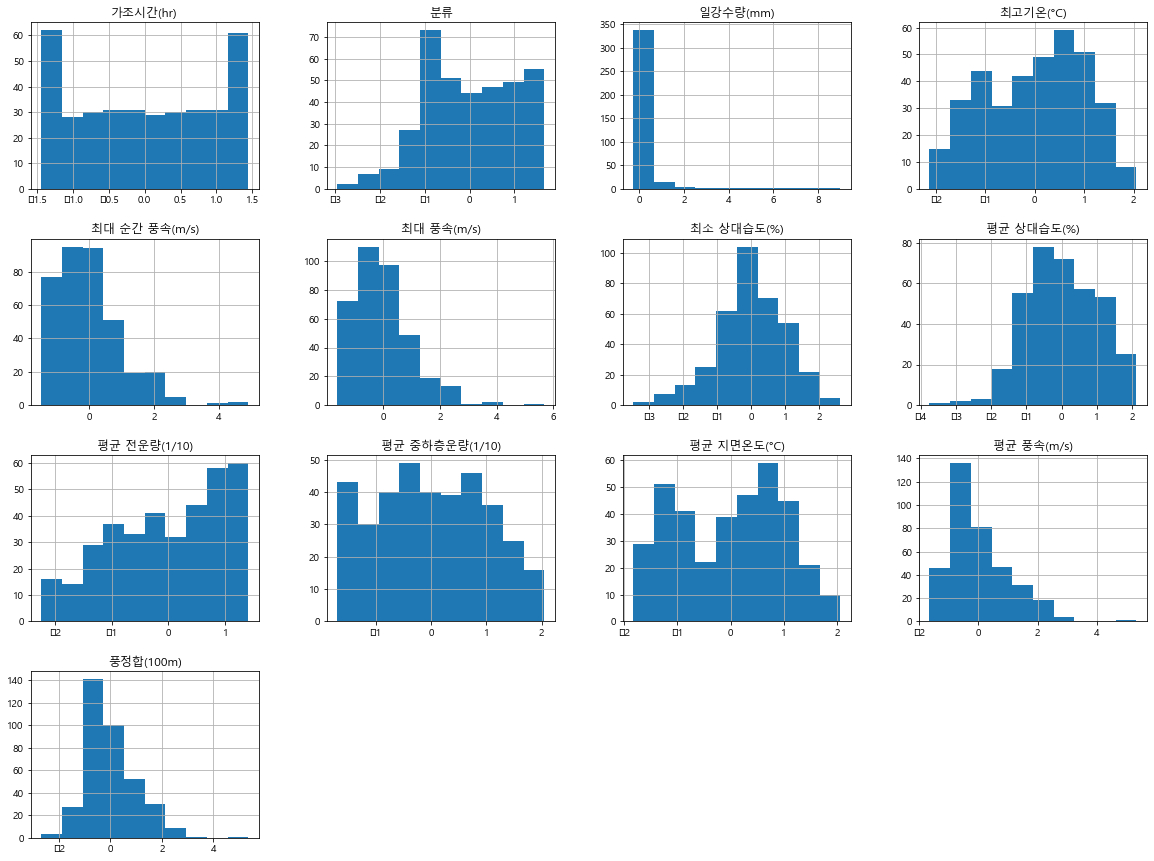

In [50]:
# standardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)
df = pd.DataFrame(X_scaled, columns = X.columns)
df.hist( figsize = (20 , 15))
plt.show()

In [ ]:
#다시

In [99]:

from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)
#euc-kr
df = pd.read_csv("종관기상관측(2019)분류까지_제주.csv",encoding = 'euc-kr',index_col = 0)
df

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 풍속(m/s),최대 풍속 풍향(16방위),...,평균 현지기압(hPa),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),최저 초상온도(°C),분류
지점,,,,,,,,,,,,,,,,,,,,,
184,제주,2019-01-01,5.6,4.8,7.0,0.0,13.6,320.0,7.6,320,...,1031.7,1035.5,1032.3,1034.3,10.0,9.0,9.0,4.8,4.3,45
184,제주,2019-01-02,5.1,4.5,6.1,NaN,11.4,22.5,6.2,360,...,1031.7,1035.9,1032.2,1034.3,9.9,8.8,8.8,4.6,2.9,45
184,제주,2019-01-03,5.1,3.5,8.0,NaN,8.2,14.1,5.1,20,...,1031.8,1036.6,1033.2,1034.4,9.9,4.1,4.1,5.5,-1.8,54
184,제주,2019-01-04,5.8,2.6,10.0,1.6,7.6,30.9,4.6,20,...,1027.2,1033.7,1027.2,1029.8,9.9,8.1,6.3,5.2,-2.6,41
184,제주,2019-01-05,7.0,5.2,9.0,NaN,8.9,0.0,5.1,360,...,1023.5,1027.5,1024.6,1026.0,9.9,5.9,5.1,6.6,0.1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,제주,2019-12-27,6.7,5.7,7.3,NaN,17.5,292.5,9.5,320,...,1023.0,1028.1,1021.8,1025.6,10.0,8.6,8.6,6.2,4.1,45
184,제주,2019-12-28,7.7,6.1,9.7,NaN,6.6,303.8,4.0,340,...,1025.7,1030.2,1027.1,1028.3,10.0,4.8,3.8,7.2,1.1,61
184,제주,2019-12-29,11.8,7.1,16.4,11.4,10.8,275.6,5.9,290,...,1020.3,1028.3,1019.5,1022.9,10.0,9.6,7.0,9.3,1.1,36


In [100]:
df.dtypes

지점명                   object
일시                    object
평균기온(°C)             float64
최저기온(°C)             float64
최고기온(°C)             float64
일강수량(mm)             float64
최대 순간 풍속(m/s)        float64
최대 순간 풍속 풍향(16방위)    float64
최대 풍속(m/s)           float64
최대 풍속 풍향(16방위)         int64
평균 풍속(m/s)           float64
풍정합(100m)            float64
최다풍향(16방위)           float64
평균 이슬점온도(°C)         float64
최소 상대습도(%)           float64
평균 상대습도(%)           float64
평균 증기압(hPa)          float64
평균 현지기압(hPa)         float64
최고 해면기압(hPa)         float64
최저 해면기압(hPa)         float64
평균 해면기압(hPa)         float64
가조시간(hr)             float64
평균 전운량(1/10)         float64
평균 중하층운량(1/10)       float64
평균 지면온도(°C)          float64
최저 초상온도(°C)          float64
분류                     int64
dtype: object

In [101]:
df["일강수량(mm)"].fillna(0,inplace =True)
df=df.dropna(axis = 0 )
df.head()
df.isnull().sum()
df.corr()
x, y = df.iloc[:,2:],df.iloc[:,-1]
x

,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 풍속(m/s),최대 풍속 풍향(16방위),평균 풍속(m/s),풍정합(100m),...,평균 현지기압(hPa),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),최저 초상온도(°C),분류
지점,,,,,,,,,,,,,,,,,,,,,
184,5.6,4.8,7.0,0.0,13.6,320.0,7.6,320,5.3,4560.0,...,1031.7,1035.5,1032.3,1034.3,10.0,9.0,9.0,4.8,4.3,45
184,5.1,4.5,6.1,0.0,11.4,22.5,6.2,360,3.9,340560.0,...,1031.7,1035.9,1032.2,1034.3,9.9,8.8,8.8,4.6,2.9,45
184,5.1,3.5,8.0,0.0,8.2,14.1,5.1,20,2.7,234000.0,...,1031.8,1036.6,1033.2,1034.4,9.9,4.1,4.1,5.5,-1.8,54
184,5.8,2.6,10.0,1.6,7.6,30.9,4.6,20,2.0,174960.0,...,1027.2,1033.7,1027.2,1029.8,9.9,8.1,6.3,5.2,-2.6,41
184,7.0,5.2,9.0,0.0,8.9,0.0,5.1,360,3.2,274320.0,...,1023.5,1027.5,1024.6,1026.0,9.9,5.9,5.1,6.6,0.1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,6.7,5.7,7.3,0.0,17.5,292.5,9.5,320,5.2,449640.0,...,1023.0,1028.1,1021.8,1025.6,10.0,8.6,8.6,6.2,4.1,45
184,7.7,6.1,9.7,0.0,6.6,303.8,4.0,340,2.0,169920.0,...,1025.7,1030.2,1027.1,1028.3,10.0,4.8,3.8,7.2,1.1,61
184,11.8,7.1,16.4,11.4,10.8,275.6,5.9,290,2.9,246600.0,...,1020.3,1028.3,1019.5,1022.9,10.0,9.6,7.0,9.3,1.1,36


In [102]:
# standardScaler
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.fit_transform(X)
#df = pd.DataFrame(X_scaled, columns = X.columns)
#df.hist( figsize = (20 , 15))
#plt.show()

# Gridsearch CV

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  

#x=df.drop("분류",axis=1)
#y=df["분류"]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)



In [104]:
#from sklearn.svm import SVC 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
#svm=SVC()
#svm.fit(x_train_scaled,y_train)
x_test_scaled=scaler.transform(x_test)

#df = pd.DataFrame(X_scaled, columns = X.columns)
#df.hist( figsize = (20 , 15))
#plt.show()

C:\Users\ICT01_23\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

param_grid={'n_estimators':[3,10,30],'max_features':[2,4,6,8]}

forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',
                        return_train_score=True)

grid_search.fit(x_train_scaled,y_train)

C:\Users\ICT01_23\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': [2, 4, 6, 8],
 

In [112]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [113]:
grid_search.score(x_test_scaled, y_test)

-9.436468797564686

In [114]:
grid_search.best_score_

-9.780446735395191

In [ ]:
# standardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)
df = pd.DataFrame(X_scaled, columns = X.columns)
df.hist( figsize = (20 , 15))
plt.show()

#df.data = df[['일강수량(mm)','가조시간(hr)','평균 전운량(1/10)',
#                      '평균 중하층운량(1/10)','평균 지면온도(°C)' ]]
#df.target = df[["분류"]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, train_size=0.8, test_size=0.2)

# pca

In [22]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X2D=pca.fit_transform(X)
X2D

array([[-2.50931514e+05,  7.80599311e+00],
       [ 8.50684849e+04, -4.31953600e+00],
       [-2.14915154e+04, -1.00950428e+01],
       [-8.05315146e+04,  1.80150297e+01],
       [ 1.88284844e+04, -3.49694991e+00],
       [-3.33715152e+04,  1.94709005e-01],
       [-6.68515156e+04,  6.79468365e-01],
       [ 1.20348485e+05, -3.56175802e+00],
       [ 5.50848503e+03, -7.08639455e+00],
       [ 2.62848491e+03,  3.01865940e+00],
       [-5.64115146e+04,  1.29490064e+01],
       [-1.68115155e+04,  2.34877927e+00],
       [ 4.40284846e+04, -1.70881031e+00],
       [-7.76515155e+04,  3.27277168e+00],
       [ 1.14588484e+05, -9.24255059e+00],
       [ 1.16028485e+05, -1.39396394e+00],
       [ 1.16748485e+05, -9.71076557e+00],
       [-8.80915158e+04, -4.16903401e+00],
       [-6.00115153e+04,  1.04838683e+01],
       [ 2.20788484e+05, -1.28839545e+01],
       [ 1.26468484e+05, -9.65064989e+00],
       [ 4.58284840e+04, -1.67592127e+01],
       [ 4.72684837e+04, -1.91965728e+01],
       [-8.

In [23]:
pca.explained_variance_ratio_


array([9.99999851e-01, 7.12066091e-08])

In [24]:
pca=PCA()
pca.fit(X_train)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

In [30]:
pca=PCA(n_components=0.95)
X_reduced=pca.fit_transform(X_train)
X_reduced

array([[-3.64624616e-01,  2.76870520e+00,  4.76319577e-01],
       [-1.42756439e+00, -9.50378516e-01,  1.31338314e-01],
       [-7.96990579e-01,  3.35085294e+00,  1.51502480e+00],
       [ 1.11832281e+00,  1.12509441e+00, -9.23799021e-01],
       [ 3.14950045e-01,  7.77795469e-01, -7.65267523e-01],
       [ 6.06706213e-01, -1.40319343e+00,  5.86739281e-01],
       [-2.57558505e-01,  1.72849143e-01, -4.71488259e-01],
       [ 2.86299449e-01, -1.15560670e+00,  4.20634227e-01],
       [ 1.18197651e+00,  4.37696719e-01, -4.81629440e-01],
       [-9.55517176e-01, -1.11710948e+00,  2.77914458e-01],
       [ 2.88344461e+00,  2.94651887e-01, -2.38080724e-01],
       [-2.39770389e+00,  5.85591179e-01,  1.67998605e-01],
       [-1.92496777e-01, -2.21956353e+00,  1.04089107e+00],
       [-3.34522633e-01,  1.32754155e+00, -1.19372743e+00],
       [ 2.94965843e+00, -5.25234796e-01,  2.91309942e-01],
       [ 1.13338085e+00,  7.05572005e-01, -6.53342215e-01],
       [-1.83149914e-01,  1.08109504e+00

In [31]:
pca.explained_variance_ratio_

array([0.44705994, 0.357489  , 0.14731339])